In [1]:
import numpy as np 
import pandas as pd 

In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns
df = pd.read_csv('/kaggle/input/english-preprocessed1/english_preprocessed (1).csv')
print(df.head())


                                                                                                                                                                                                                                        text  \
0                                                    if you made it through this were not only able to start making money for yourself but sustain living that way all from home fuck these company corporate pig power to the people always   
1                                                                                                                                                                                 technically that is still turning back the clock dick head   
2  and you are the govt stop thinking about world medium liberal gang or any optic whatsoever and act now already if this is what a person at your level is facing then shudder to think the plight of common people in bengal bengalburning   
3                                       

**Install Transformer**

In [3]:
# install transformers
!pip install "transformers ==4.16.2"
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 35.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.14.3 requires transformers>=4.33.1, but you have transformers 4.16.2 which is incompatible.


In [4]:
# load tokens
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
# print first text
df.text.values[0]

'if you made it through this were not only able to start making money for yourself but sustain living that way all from home fuck these company corporate pig power to the people always'

In [6]:
#Print tokens of first text
print({x : tokenizer.encode(x, add_special_tokens=False) for x in df.text.values[0].split()})

{'if': [2174], 'you': [398], 'made': [7228], 'it': [442], 'through': [8305], 'this': [903], 'were': [3542], 'not': [959], 'only': [4734], 'able': [19048], 'to': [47], 'start': [4034], 'making': [20662], 'money': [17265], 'for': [100], 'yourself': [31949], 'but': [1284], 'sustain': [205027], 'living': [38043], 'that': [450], 'way': [3917], 'all': [756], 'from': [1295], 'home': [5368], 'fuck': [40878], 'these': [6097], 'company': [14380], 'corporate': [145781], 'pig': [53408], 'power': [14537], 'the': [70], 'people': [3395], 'always': [11343]}


In [7]:
#drop null values
df = df.dropna()

**Finding Max length of tokenized sentence**

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


max:  116
min:  3


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500')])

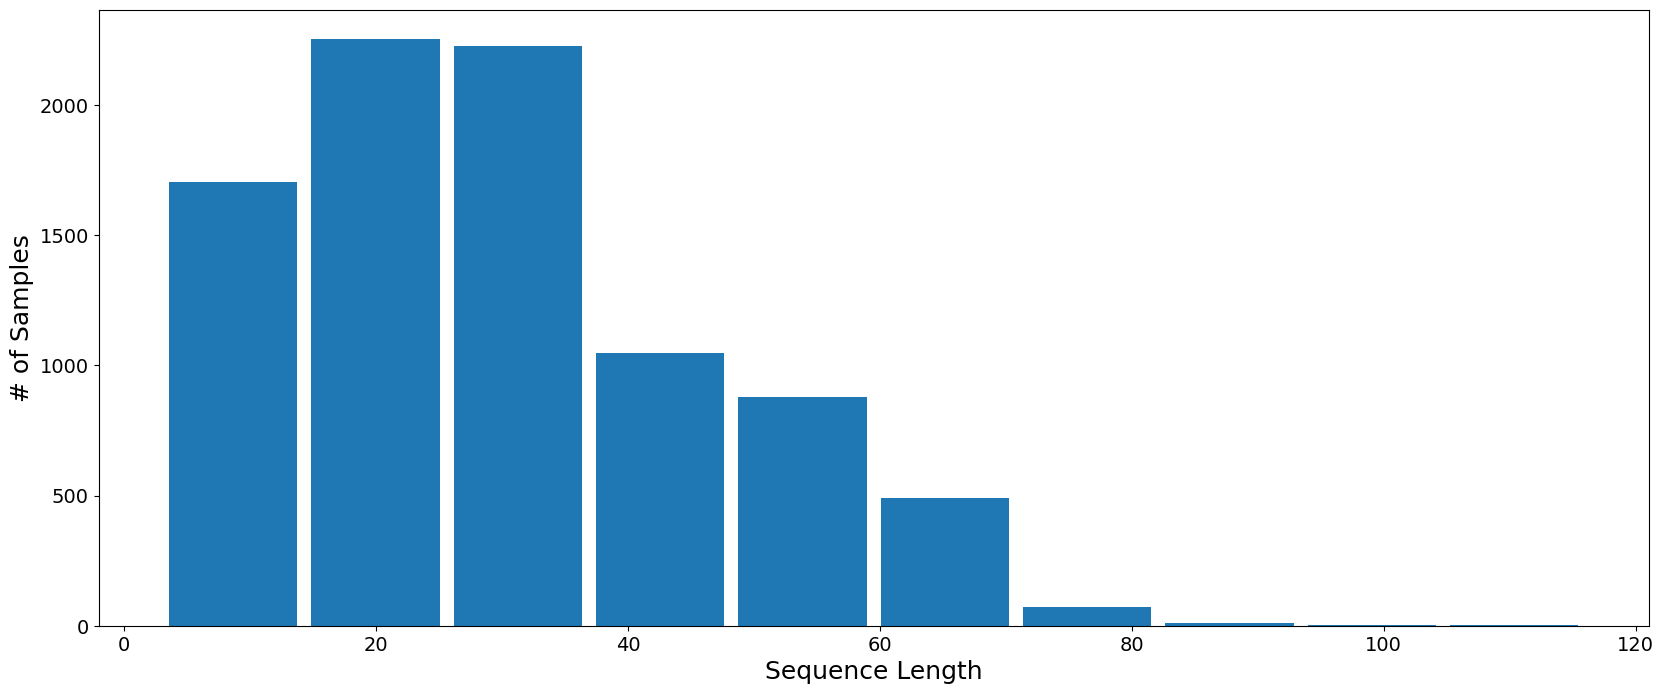

In [8]:
# install matplotlib
!pip install matplotlib
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.text.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

**Identify Features and target**

In [9]:
# identify features and target
features = df.text.values.tolist()
target = df.label.values.tolist()

**Tokenize Features**

In [10]:
# tokenize features
MAX_LEN = 116
tokenized_feature = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            features,
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True,
                            # Add empty tokens if len(text)<MAX_LEN
                            padding = 'max_length',
                            # Truncate all sentences to max length
                            truncation=True,
                            # Set the maximum length
                            max_length = MAX_LEN,
                            # Return attention mask
                            return_attention_mask = True,
                            # Return pytorch tensors
                            return_tensors = 'pt'
                   )

In [11]:
print(tokenized_feature)

{'input_ids': tensor([[     0,   2174,    398,  ...,      1,      1,      1],
        [     0, 121392,    538,  ...,      1,      1,      1],
        [     0,    136,    398,  ...,      1,      1,      1],
        ...,
        [     0,  88669,    111,  ...,      1,      1,      1],
        [     0,     70,  67915,  ...,      1,      1,      1],
        [     0,  17723, 101207,  ...,      1,      1,      1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


**Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split

# First, split the data into training and the rest
train_inputs, rest_inputs, train_labels, rest_labels, train_masks, rest_masks = train_test_split(tokenized_feature['input_ids'],
                                                                                                target,
                                                                                                tokenized_feature['attention_mask'],
                                                                                                random_state=2018,
                                                                                                test_size=0.2,
                                                                                                stratify=target)

# Then, split the rest into validation and testing
validation_inputs, test_inputs, validation_labels, test_labels, validation_masks, test_masks = train_test_split(rest_inputs,
                                                                                                                  rest_labels,
                                                                                                                  rest_masks,
                                                                                                                  random_state=2018,
                                                                                                                  test_size=0.5,
                                                                                                                stratify=rest_labels)
                               

In [13]:
len(validation_inputs)

869

In [14]:
train_inputs.shape

torch.Size([6948, 116])

**Create Dataloaders**

In [15]:
# define batch_size
batch_size = 16
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set
validation_data = TensorDataset(validation_inputs, validation_masks, torch.tensor(validation_labels))
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, torch.tensor(test_labels))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


**Define XMLR Pretrained model**

In [16]:

from transformers import XLMRobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
model = XLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base",
    # Specify number of classes
    num_labels = len(set(target)),
    # Whether the model returns attentions weights
    output_attentions = False,
    # Whether the model returns all hidden-states
    output_hidden_states = False
)

2024-04-15 14:39:30.463196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 14:39:30.463302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 14:39:30.602470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [17]:
from torch import nn
class CustomRobertaClassificationHead(nn.Module):
    def __init__(self, input_size, hidden_size, num_labels):
        super(CustomRobertaClassificationHead, self).__init__()
        print(input_size)
        self.dense = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.additional_linear = nn.Linear(768, 768)  # Add one more linear layer
        self.out_proj = nn.Linear(hidden_size, num_labels)

    def forward(self, x):
        x = self.dropout(x)
        batch_size = x.size(0)  # Get the batch size dynamically
        x = x.view(-1, x.size(-1))  # Reshape without hardcoding input_size
        x = nn.functional.relu(self.dense(x))
        x = self.dropout(x)
        x = x.view(batch_size, -1, 768)  # Reshape to original shape for additional_linear
        x = nn.functional.relu(self.additional_linear(x))  # Pass through additional linear layer
        x = self.dropout(x)
        x = x.mean(dim=1)  # Pooling operation to aggregate information across tokens
        x = self.out_proj(x)
        return x


In [18]:

input_size = model.config.hidden_size  # Input size is the hidden size of RoBERTa
hidden_size = 768
num_labels = 2  # Number of output labels

model.config.num_labels = num_labels
model.classifier = CustomRobertaClassificationHead(input_size, hidden_size, num_labels)


768


**Define Optimizer**

In [19]:
# Optimizer 
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8,
                  weight_decay=0.01
                )

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


**Define Scheduler and epochs**

In [20]:
# Number of training epochs
epochs = 4
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 5,
                                            num_training_steps = total_steps)

In [21]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('Using GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('Using CPU')


Using GPU: Tesla P100-PCIE-16GB


In [22]:
#move model to device
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [23]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [24]:

import random

seed_val = 111

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

**Training and Validation Phase**

In [25]:
from sklearn.metrics import classification_report

train_losses= []
val_losses=[]

for n in range(epochs):
    # List to store predictions and ground truth labels for both training and validation sets
    train_preds = []
    train_labels_all = []
    val_preds = []
    val_labels_all = []

    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    # Calculate number of mini-batches for training and validation sets
    num_mb_train = len(train_dataloader)
    num_mb_val = len(validation_dataloader)

    # Training phase
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()

        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        loss = outputs[0]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        train_loss += loss.data / num_mb_train

        # Append predictions and labels
        train_preds += torch.argmax(outputs.logits, dim=1).cpu().tolist()
        train_labels_all += mb_y.cpu().tolist()

    # Validation phase
    with torch.no_grad():
        model.eval()

        for k, (mb_x, mb_m, mb_y) in enumerate(validation_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)

            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            loss = outputs[0]
            val_loss += loss.data / num_mb_val

            # Append predictions and labels
            val_preds += torch.argmax(outputs.logits, dim=1).cpu().tolist()
            val_labels_all += mb_y.cpu().tolist()

    # Compute metrics
    train_report = classification_report(train_labels_all, train_preds, target_names=['NOT', 'HOF'])
    val_report = classification_report(val_labels_all, val_preds, target_names=['NOT', 'HOF'])

    print(f'Training report after iteration {n+1}:\n{train_report}')
    print(f'Validation report after iteration {n+1}:\n{val_report}')

    train_losses.append(train_loss.cpu())
    val_losses.append(val_loss.cpu())

    end_time = time.time()
    epoch_mins, epoch_secs = divmod(end_time - start_time, 60)
    print(f'Time: {epoch_mins}m {epoch_secs}s')


Training report after iteration 1:
              precision    recall  f1-score   support

         NOT       0.77      0.73      0.75      3708
         HOF       0.71      0.76      0.73      3240

    accuracy                           0.74      6948
   macro avg       0.74      0.74      0.74      6948
weighted avg       0.74      0.74      0.74      6948

Validation report after iteration 1:
              precision    recall  f1-score   support

         NOT       0.75      0.93      0.83       463
         HOF       0.89      0.65      0.75       406

    accuracy                           0.80       869
   macro avg       0.82      0.79      0.79       869
weighted avg       0.82      0.80      0.79       869

Time: 1.0m 38.11675715446472s
Training report after iteration 2:
              precision    recall  f1-score   support

         NOT       0.83      0.87      0.85      3708
         HOF       0.84      0.80      0.82      3240

    accuracy                           0.84  

In [26]:
print(train_losses)

[tensor(0.5262), tensor(0.3849), tensor(0.3145), tensor(0.2540)]


In [27]:
print(val_losses)

[tensor(0.4869), tensor(0.3905), tensor(0.3633), tensor(0.3928)]


**Test Phase**

In [28]:
# Testing 
model.eval()
test_preds = []
test_labels_all = []

with torch.no_grad():
    for mb_x, mb_m, mb_y in test_dataloader:
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)

        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        test_preds += torch.argmax(outputs.logits, dim=1).cpu().tolist()
        test_labels_all += mb_y.cpu().tolist()

# Compute and print classification report for testing
test_report = classification_report(test_labels_all, test_preds, target_names=['NOT', 'HOF'])
print(f'Testing report:\n{test_report}')

Testing report:
              precision    recall  f1-score   support

         NOT       0.84      0.88      0.86       464
         HOF       0.85      0.80      0.83       405

    accuracy                           0.84       869
   macro avg       0.84      0.84      0.84       869
weighted avg       0.84      0.84      0.84       869



**Confusion matrix for Test Data**

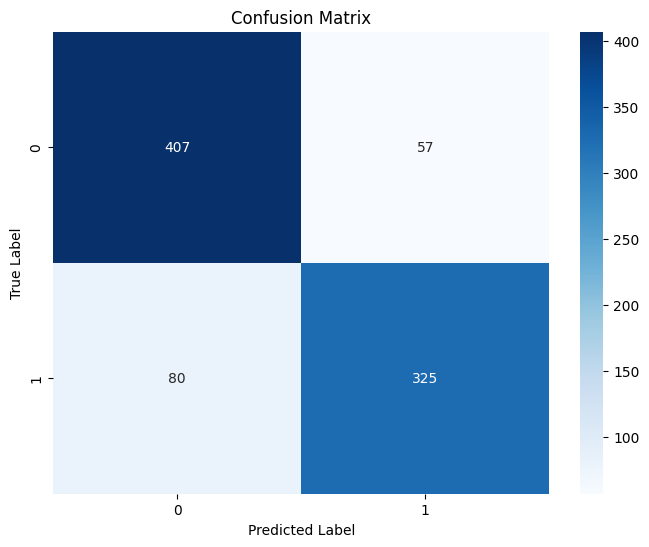

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(test_labels_all, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()